### Load Dataset dan Pengecekan Awal

In [118]:
import numpy as np
import pandas as pd

df = pd.read_csv('kc_house_data.csv')

Informasi dasar pada dataset

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Menampilkan 5 baris pertama

In [120]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Pembersihan Data

Menghapus kolom yang tidak diperlukan

In [121]:
df.drop(['id', 'date', 'zipcode'], axis=1, inplace=True)

Mengecek missing values

In [122]:
print(df.isnull().sum())

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


Cek Outliers Pada Setiap Kolom

In [123]:
simpan_outlier = []

numerik_cols = df.select_dtypes(include=['int64', 'float64']).columns

for kolom in numerik_cols:
    Q1 = df[kolom].quantile(0.25)
    Q3 = df[kolom].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[kolom] < lower_bound) | (df[kolom] > upper_bound)]
    print(f"{kolom} : {outliers.shape[0]} outlier")


price : 1146 outlier
bedrooms : 546 outlier
bathrooms : 571 outlier
sqft_living : 572 outlier
sqft_lot : 2425 outlier
floors : 0 outlier
waterfront : 163 outlier
view : 2124 outlier
condition : 30 outlier
grade : 1911 outlier
sqft_above : 611 outlier
sqft_basement : 496 outlier
yr_built : 0 outlier
yr_renovated : 914 outlier
lat : 2 outlier
long : 256 outlier
sqft_living15 : 544 outlier
sqft_lot15 : 2194 outlier


Cek distribusi frekuensi kolom grade

In [124]:
df['grade'].value_counts()

grade
7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: count, dtype: int64

Cek distribusi frekuensi kolom view

In [125]:
df['view'].value_counts()

view
0    19489
2      963
3      510
1      332
4      319
Name: count, dtype: int64

Pengelompokan (Regrouping ordinal) menjadi 3 yaitu
low : rumah dengan grade kualitas rendah
mid : rumah dengan grade kualitas normal
high : rumah dengan grade kualitas tinggi

In [126]:
def regroup_grade(x):
    if x <= 5:
        return 'low'
    elif x <= 8:
        return 'mid'
    else:
        return 'high'

df['grade_group'] = df['grade'].apply(regroup_grade)
print(df['grade_group'].value_counts())

grade_group
mid     17087
high     4251
low       275
Name: count, dtype: int64


Pengelompokan (Regrouping binary)
1 : memiliki pemandangan
0 : tidak memiliki pemandangan

In [127]:
df['has_view'] = df['view'].apply(lambda x: 1 if x > 0 else 0)

print(df['has_view'].value_counts())

has_view
0    19489
1     2124
Name: count, dtype: int64


Kolom grade_group di label encoding karena kategori bersifat ordinal (memiliki urutan)
bukan one hot encoding (digunakan jika kategori nominal / tidak memiliki urutan)

In [128]:
grade_mapping = {'low': 0, 'mid': 1, 'high': 2}
df['grade_encoded'] = df['grade_group'].map(grade_mapping)

print(df[['grade_group', 'grade_encoded']].head())


  grade_group  grade_encoded
0         mid              1
1         mid              1
2         mid              1
3         mid              1
4         mid              1


Menghapus kolom yang sudah tidak diperlukan karna sudah tergantikan oleh kolom lain

In [129]:
df.drop(columns=['grade', 'grade_group', 'view'], inplace=True)

Menampilkan 5 baris pertama

In [130]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,has_view,grade_encoded
0,221900.0,3,1.00,1180,5650,1.0,0,3,1180,0,1955,0,47.5112,-122.257,1340,5650,0,1
1,538000.0,3,2.25,2570,7242,2.0,0,3,2170,400,1951,1991,47.7210,-122.319,1690,7639,0,1
2,180000.0,2,1.00,770,10000,1.0,0,3,770,0,1933,0,47.7379,-122.233,2720,8062,0,1
3,604000.0,4,3.00,1960,5000,1.0,0,5,1050,910,1965,0,47.5208,-122.393,1360,5000,0,1
4,510000.0,3,2.00,1680,8080,1.0,0,3,1680,0,1987,0,47.6168,-122.045,1800,7503,0,1


Cek distribusi data pada kolom target (Price)

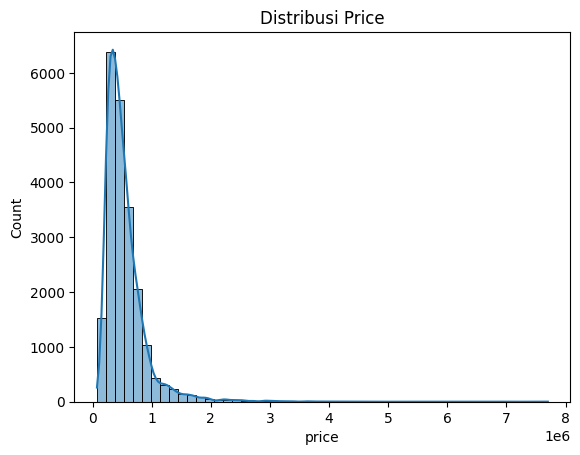

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['price'], bins=50, kde=True)
plt.title("Distribusi Price")
plt.show()

### Log Transform pada Target dan Split Data

In [134]:
from sklearn.model_selection import train_test_split


# Fitur dan target
X = df.drop('price', axis=1)
y = np.log1p(df['price'])  # log(price + 1) untuk stabilisasi distribusi target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Model XGBoost Regressor dengan Hyperparameter Tuning

In [135]:
import xgboost as xgb

xgbr = xgb.XGBRegressor(
    n_estimators=200,
    learning_rate=0.08,
    max_depth=6,
    random_state=42
)

# Training model
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.08, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

### Evaluasi Prediksi

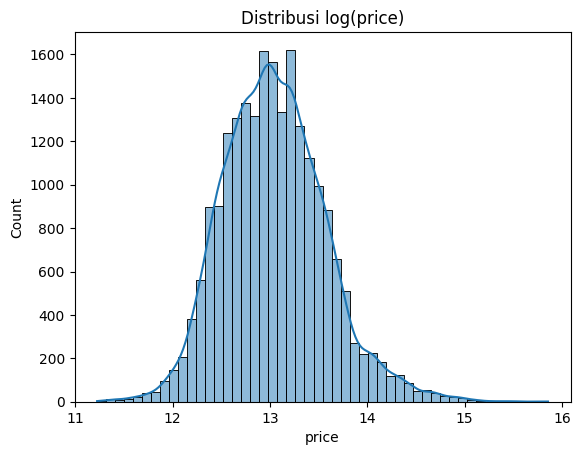

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(np.log1p(df['price']), bins=50, kde=True)
plt.title("Distribusi log(price)")
plt.show()


In [115]:
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib.ticker import FuncFormatter


y_pred_log = xgbr.predict(X_test)

# Kembalikan ke skala harga asli
y_pred = np.expm1(y_pred_log) # --> Inverse Transform dari Loh
y_test_actual = np.expm1(y_test)

rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred))
r2 = r2_score(y_test_actual, y_pred)

print("RMSE (original scale):", rmse)
print("R2 Score:", r2)

RMSE (original scale): 130122.54953512202
R2 Score: 0.8879994303041053


### Visualisasi Prediksi vs Aktual

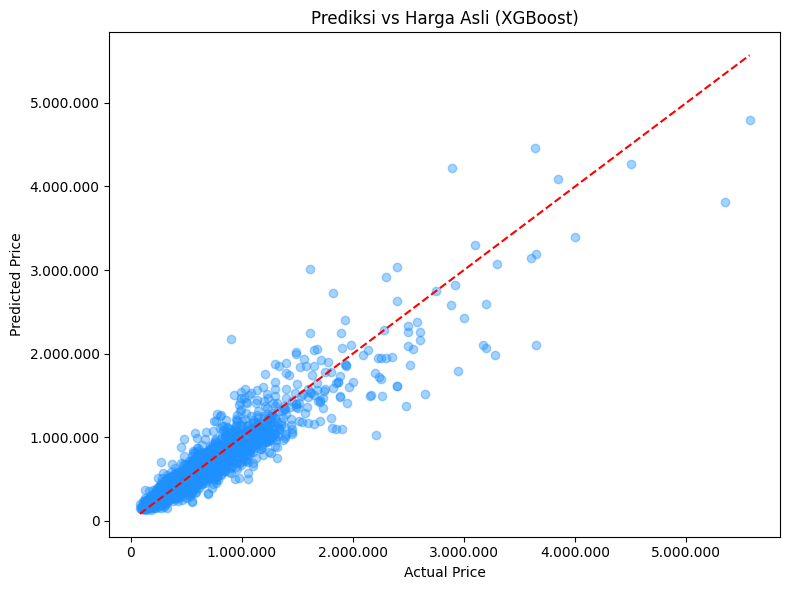

In [116]:
def ribuan(x, pos):
    return f'{int(x):,}'.replace(",", ".")

plt.figure(figsize=(8, 6))
plt.scatter(y_test_actual, y_pred, alpha=0.4, color='dodgerblue')
plt.plot([y_test_actual.min(), y_test_actual.max()],
         [y_test_actual.min(), y_test_actual.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Prediksi vs Harga Asli (XGBoost)")

formatter = FuncFormatter(ribuan)
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

### Visualisasi 5 Fitur Paling Berpengaruh terhadap Price

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20948\2206901382.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gain_df, x='Fitur', y='Gain', palette='Blues_r')


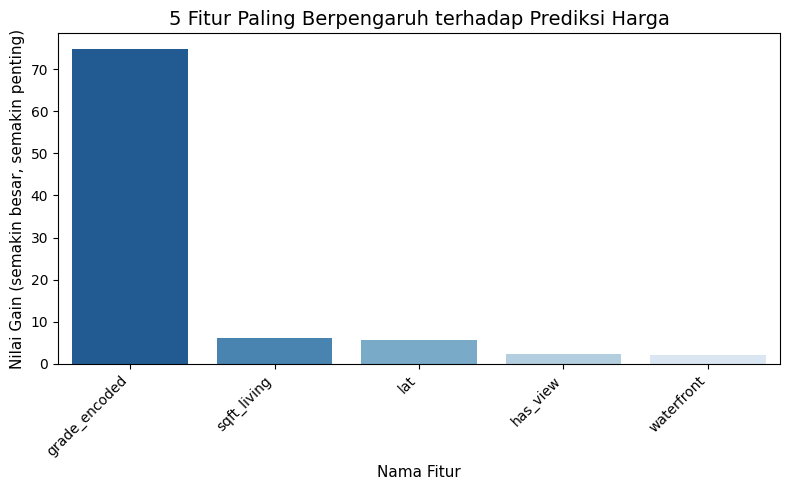

            Fitur       Gain
16  grade_encoded  74.781204
2     sqft_living   6.245088
11            lat   5.650555
15       has_view   2.417076
5      waterfront   2.086876


In [117]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ambil gain dan nama fitur
gain_dict = xgbr.get_booster().get_score(importance_type='gain')

gain_df = pd.DataFrame({
    'Fitur': list(gain_dict.keys()),
    'Gain': list(gain_dict.values())
}).sort_values(by='Gain', ascending=False).head(5)

plt.figure(figsize=(8, 5))
sns.barplot(data=gain_df, x='Fitur', y='Gain', palette='Blues_r')
plt.title("5 Fitur Paling Berpengaruh terhadap Prediksi Harga", fontsize=14)
plt.xlabel("Nama Fitur", fontsize=11)
plt.ylabel("Nilai Gain (semakin besar, semakin penting)", fontsize=11)
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

print(gain_df)

In [137]:
# Cek rata-rata harga rumah
rata_rata = df['price'].mean()
print(f"Rata-rata harga rumah: ${rata_rata:,.2f}")


Rata-rata harga rumah: $540,088.14
